In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=50

import sklearn
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# Data Load

In [5]:
df_20 = pd.read_csv('./data/innovation/create/df_age30.csv')

In [6]:
df_20.shape

(365, 38)

In [7]:
df_20.head()

,age30숙박,age30레저용품,age30레저업소,age30문화취미,age30가구,age30전기,age30주방,age30연료,age30광학,age30가전,age30유통업,age30의복,age30직물,age30신변잡화,age30서적문구,age30사무통신,age30자동차판매,age30자동차정비,age30의료기관,age30보건위생,age30요식업소,age30음료식품,age30수리서비스,age30,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,CONTENT,temp,humi,강수량(mm)
0,170.0,588.0,1435.0,481.0,8.0,NaN,NaN,1346.0,45.0,21.0,31921.0,350.0,12.0,91.0,875.0,NaN,NaN,161.0,1738.0,1946.0,17722.0,2929.0,76.0,265602.51,5.775959e+06,4.653959e+06,7.123695e+06,460575.529718,8.889679e+05,102938.908335,158304.695151,125768.139866,68.127083,35.221528,515,16.580764,56.770833,0.0
1,33.0,144.0,905.0,319.0,8.0,NaN,16.0,1198.0,70.0,95.0,27563.0,259.0,NaN,100.0,621.0,28.0,NaN,163.0,8115.0,1214.0,15401.0,3701.0,369.0,286616.48,5.798567e+06,4.068040e+06,6.922594e+06,517274.801816,7.320147e+05,85751.772442,189721.667844,159773.285544,71.924306,29.909028,888,19.631111,57.827083,0.0
2,74.0,86.0,875.0,270.0,NaN,NaN,12.0,953.0,40.0,86.0,27872.0,248.0,NaN,94.0,602.0,NaN,21.0,149.0,6476.0,1175.0,15424.0,3737.0,267.0,296960.76,5.882238e+06,4.045719e+06,6.679634e+06,396954.848039,6.941187e+05,109181.181977,146743.364491,83460.961960,72.979861,24.331944,856,19.192500,61.674306,0.1
3,62.0,85.0,877.0,155.0,NaN,NaN,NaN,1051.0,53.0,74.0,30752.0,249.0,NaN,103.0,668.0,NaN,NaN,119.0,5931.0,1241.0,16000.0,3715.0,480.0,298269.85,6.163598e+06,4.284199e+06,6.238373e+06,400734.630537,9.144325e+05,106260.195832,133827.487702,85526.543799,18.221528,10.952778,893,14.075417,60.129861,18.5
4,38.0,129.0,915.0,294.0,NaN,NaN,8.0,1019.0,58.0,56.0,25341.0,175.0,12.0,47.0,479.0,16.0,NaN,149.0,5600.0,1002.0,14145.0,3398.0,134.0,289595.03,6.131853e+06,3.723724e+06,5.135552e+06,430144.414585,1.099378e+06,120809.906702,149481.681510,89173.629481,8.854861,3.891667,864,8.620000,77.163194,10.5


Text(0.5, 0, '업종')

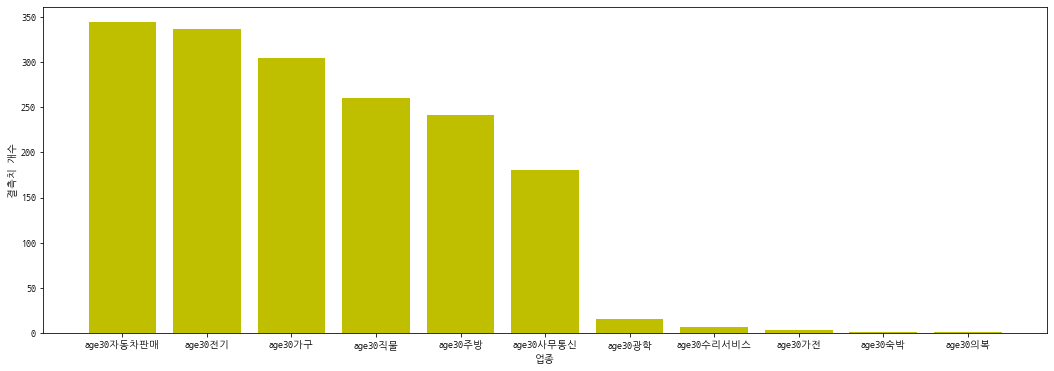

In [8]:
df_null = pd.DataFrame(df_20.isnull().sum()).rename(columns={0:'null'})

df_null.reset_index(inplace=True)

drop_idx = np.where(df_null.null==0)[0]
df_null.drop(drop_idx, inplace=True)

df_null = df_null.sort_values(by='null', ascending=False).set_index('index')

plt.figure(figsize=(18,6))
plt.bar(df_null.index, df_null.null, color='y')
plt.xticks(df_null.index)
plt.ylabel('결측치 개수')
plt.xlabel('업종')

In [40]:
df_20.isnull().sum()

age30숙박         1
age30레저용품       0
age30레저업소       0
age30문화취미       0
age30가구       305
age30전기       337
age30주방       241
age30연료         0
age30광학        16
age30가전         3
age30유통업        0
age30의복         1
age30직물       260
age30신변잡화       0
age30서적문구       0
age30사무통신     181
age30자동차판매    344
age30자동차정비      0
age30의료기관       0
age30보건위생       0
age30요식업소       0
age30음료식품       0
age30수리서비스      7
age30           0
LCLS_10_P       0
LCLS_20_P       0
LCLS_30_P       0
LCLS_40_P       0
LCLS_50_P       0
LCLS_60_P       0
LCLS_70_P       0
LCLS_80_P       0
pm10            0
pm25            0
CONTENT         0
temp            0
humi            0
강수량(mm)         0
dtype: int64

In [41]:
print('age30 null columns : ', ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '의복'])

age30 null columns :  ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '의복']


In [42]:
df_20.drop(['age30가구', 'age30전기', 'age30주방', 
           'age30광학', 'age30가전', 'age30직물', 
           'age30사무통신', 'age30자동차판매', 'age30자동차정비',
            
           'age30수리서비스', 'age30의복'], axis=1, inplace=True)

In [43]:
df_20  = df_20.rename(columns={'강수량(mm)':'prec'})

In [44]:
df_20.columns = ['숙박', '레저용품', '레저업소', '문화취미', '연료', '유통업',
       '신변잡화', '서적문구', '의료기관', '보건위생',
       '요식업소', '음료식품', 'pop', 'LCLS_10_P',
       'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P',
       'LCLS_70_P', 'LCLS_80_P', 'pm10', 'pm25', 'CONTENT', 'temp', 'humi',
       'prec']

<BarContainer object of 12 artists>

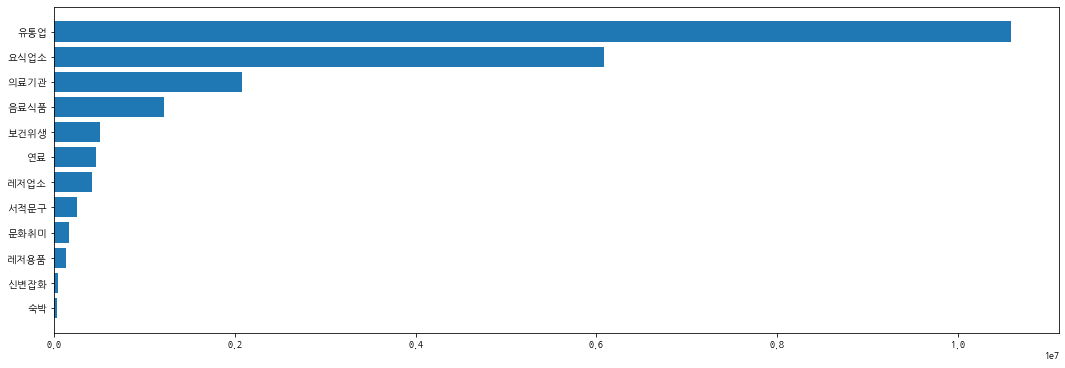

In [45]:
df_viz = df_20[['숙박', '레저용품', '레저업소', '문화취미', '연료', '유통업',
       '신변잡화', '서적문구', '의료기관', '보건위생',
       '요식업소', '음료식품']].apply(lambda df:df.sum()).sort_values()

plt.figure(figsize=(18,6))
plt.barh(df_viz.index,
        df_viz)

# Two_way Anova (F)

In [46]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
# good_idx = np.where(df_20.pm10<=50)[0]

# bad_idx = np.where(df_20.pm10>50)[0]

# df_20['pm10_category']=[0]*len(df_20)

In [13]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm10_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm10_category'].iloc[i] = 'bad'

In [14]:
# good_idx_25 = np.where(df_20.pm25<=25)[0]

# bad_idx_25 = np.where(df_20.pm25>25)[0]

# df_20['pm25_category']=[0]*len(df_20)

In [15]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm25_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm25_category'].iloc[i] = 'bad'

In [16]:
# good_idx_temp = np.where(df_20.temp<=35)[0]

# bad_idx_temp = np.where(df_20.temp>35)[0]

# df_20['temp_category']=[0]*len(df_20)

In [17]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['temp_category'].iloc[i] = 'bad'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['temp_category'].iloc[i] = 'good'

In [16]:
# df_anova = df_20[['age20숙박_USE_AMT', 'pm10', 'pm25', 'temp']]

* anova function

In [101]:
formula = '숙박 ~ pm10 + pm25 + temp + humi + prec + pm10:temp + pm10:prec + pm25:temp + pm25:prec'
# :뒤로넣으면 서로 겹치는 변수를 고려해서 반영해주는것.
lm = ols(formula, df_20).fit()

In [102]:
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
pm10,1.0,7.507348e+04,75073.479325,4.968606,0.026437
pm25,1.0,3.745534e+04,37455.337109,2.478915,0.116273
temp,1.0,1.757853e+04,17578.528367,1.163404,0.281493
humi,1.0,1.467224e+04,14672.243167,0.971056,0.325088
prec,1.0,6.108905e+02,610.890518,0.040431,0.840756
pm10:temp,1.0,1.911251e+04,19112.513535,1.264928,0.261480
pm10:prec,1.0,5.420094e+00,5.420094,0.000359,0.984900
pm25:temp,1.0,2.306983e+03,2306.982800,0.152684,0.696218
pm25:prec,1.0,2.999732e+03,2999.732331,0.198532,0.656180
Residual,355.0,5.363896e+06,15109.567143,NaN,NaN


In [49]:
def anova(col_name):
    formula = col_name + ' ~ pm10 + pm25 + temp + humi + prec + CONTENT + CONTENT:temp + CONTENT:prec + CONTENT:humi'
    lm = ols(formula, df_20).fit()
    return lm.summary()

In [50]:
def coef_bar(colname):
    X = df_20.drop(colname, axis=1)
    Y = df_20[colname]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    ridge = Ridge(fit_intercept=True,
    #               alpha=0.5
                 )
    # solver : svd, 초코피? 는 NE바로안될떄 적용하고, 뒤에 4개는 SGD에 사용
    ridge.fit(X_train,y_train)
    # lasso.fit(X_train, y_train)

    # set_df
    df_sukbak = pd.DataFrame(ridge.coef_, df_20.drop(colname,axis=1).columns).rename(columns={0:'coef'})
    df_sukbak = df_sukbak.sort_values(by='coef', ascending=False)

    # bar
    plt.figure(figsize=(12, 6))
    plt.barh(df_sukbak.index, df_sukbak['coef'])
    # plt.xticks(df_sukbak['coef'])
    return None

# Check Coef

In [51]:
from sklearn.linear_model import Lasso, Ridge

In [52]:
from sklearn.model_selection import train_test_split

## 숙박 10

In [50]:
anova("숙박")

(                 df         sum_sq        mean_sq           F        PR(>F)
 pm10            1.0    5500.425612    5500.425612    3.224574  7.339335e-02
 pm25            1.0     906.117490     906.117490    0.531203  4.665834e-01
 temp            1.0    7883.308244    7883.308244    4.621517  3.225040e-02
 humi            1.0    5929.307514    5929.307514    3.476002  6.309244e-02
 prec            1.0     735.099347     735.099347    0.430945  5.119520e-01
 CONTENT         1.0  207581.779054  207581.779054  121.692920  1.608558e-24
 CONTENT:temp    1.0   37642.715134   37642.715134   22.067698  3.772468e-06
 CONTENT:prec    1.0    2852.312264    2852.312264    1.672142  1.968151e-01
 CONTENT:humi    1.0     317.770640     317.770640    0.186290  6.662852e-01
 Residual      354.0  603847.370746    1705.783533         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       

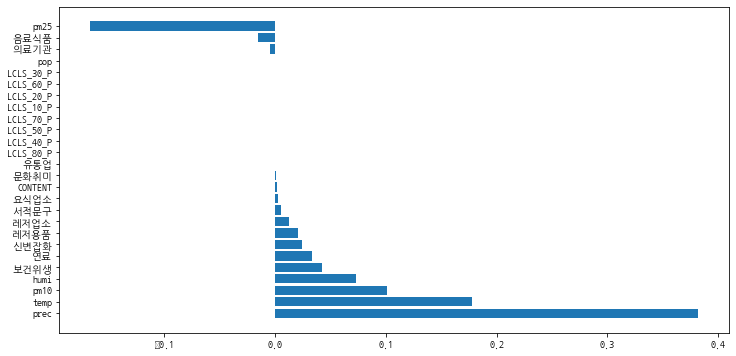

In [51]:
coef_bar('숙박')

## 레저용품 20

In [52]:
anova("레저용품")

(                 df        sum_sq       mean_sq           F        PR(>F)
 pm10            1.0  6.709977e+04  6.709977e+04    2.917459  8.849994e-02
 pm25            1.0  4.191943e+05  4.191943e+05   18.226327  2.520563e-05
 temp            1.0  2.722123e+04  2.722123e+04    1.183564  2.773698e-01
 humi            1.0  3.933178e+05  3.933178e+05   17.101230  4.427585e-05
 prec            1.0  1.167452e+04  1.167452e+04    0.507602  4.766469e-01
 CONTENT         1.0  3.630503e+06  3.630503e+06  157.852186  3.323623e-30
 CONTENT:temp    1.0  4.241539e+05  4.241539e+05   18.441968  2.263420e-05
 CONTENT:prec    1.0  6.768573e+03  6.768573e+03    0.294294  5.878225e-01
 CONTENT:humi    1.0  1.242268e+05  1.242268e+05    5.401310  2.068550e-02
 Residual      355.0  8.164782e+06  2.299939e+04         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   레저용품   R-s

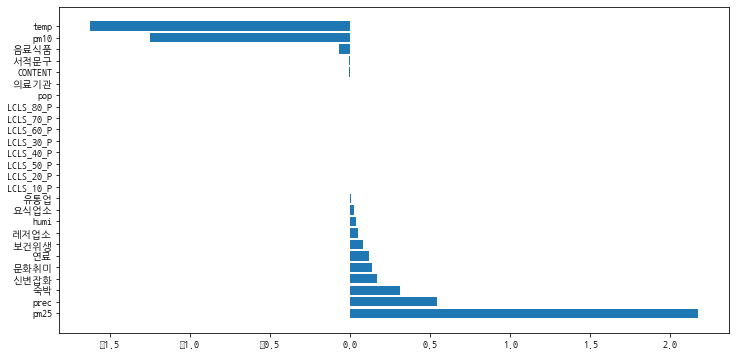

In [53]:
coef_bar('레저용품')

# 레저업소 21

In [56]:
anova('레저업소')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   레저업소   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     24.16
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           3.43e-32
Time:                        00:33:38   Log-Likelihood:                -2575.2
No. Observations:                 365   AIC:                             5170.
Df Residuals:                     355   BIC:                             5209.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1410.1330    143.320      9.839      0.000    1128.270    1691.996
pm10            -1.2678      1.111     -1.141      0.255      -3.453       0.918
pm25             5.2710      1.499      3.515      0.000       2.322       8.220
temp             3.8380      3.766      1.019      0.309      -3.569      11.245
humi            -0.5176      3.122     -0.166      0.868      -6.657       5.621
prec            -1.7216      3.553     -0.485      0.628      -8.709       5.266
CONTENT         -0.2395      0.219     -1.096      0.274      -0.669       0.190
CONTENT:temp    -0.0220      0.007     -3.049      0.002      -0.036      -0.008
CONTENT:prec     0.0048      0.006      0.801      0.424      -0.007       0.017
CONTENT:humi    -0.0054      0.005     -1.089      0.277      -0.015       0.004
==============================================================================
Omnibus:                       22.177   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.450
Skew:                           0.557   Prob(JB):                     2.98e-06
Kurtosis:                       3.659   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 문화취미 22

In [54]:
anova("문화취미")

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  2.068681e+04  2.068681e+04   0.508166  4.764022e-01
 pm25            1.0  7.047461e+04  7.047461e+04   1.731190  1.891080e-01
 temp            1.0  6.644622e+04  6.644622e+04   1.632234  2.022292e-01
 humi            1.0  7.220604e+05  7.220604e+05  17.737220  3.218731e-05
 prec            1.0  1.566378e+03  1.566378e+03   0.038478  8.445993e-01
 CONTENT         1.0  3.606637e+06  3.606637e+06  88.596063  6.262966e-19
 CONTENT:temp    1.0  2.254355e+05  2.254355e+05   5.537764  1.915520e-02
 CONTENT:prec    1.0  1.172124e+04  1.172124e+04   0.287929  5.918867e-01
 CONTENT:humi    1.0  2.230792e+03  2.230792e+03   0.054799  8.150489e-01
 Residual      355.0  1.445161e+07  4.070877e+04        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   문화취미   R-squared:    

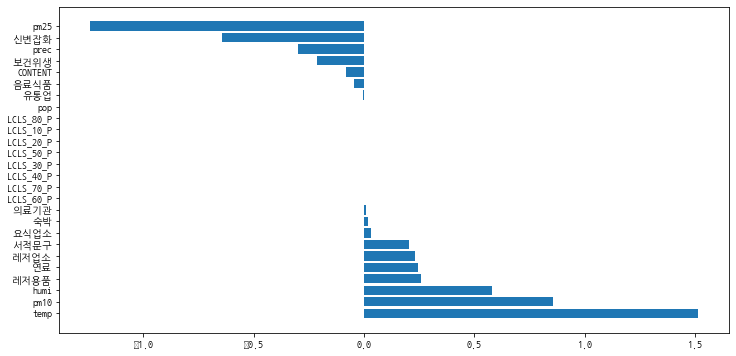

In [55]:
coef_bar('문화취미')

# 가구 30 Null로 삭제

## 전기 31 Null로 삭제

## 주방용구 32 Null로 삭제

# 연료 33

In [53]:
anova('연료')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     연료   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     28.42
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           4.82e-37
Time:                        00:30:33   Log-Likelihood:                -2428.3
No. Observations:                 365   AIC:                             4877.
Df Residuals:                     355   BIC:                             4916.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1554.7064     95.839     16.222      0.000    1366.224    1743.189
pm10            -1.0620      0.743     -1.429      0.154      -2.523       0.399
pm25             1.4675      1.003      1.464      0.144      -0.504       3.439
temp            12.5090      2.518      4.967      0.000       7.556      17.462
humi            -3.2794      2.087     -1.571      0.117      -7.385       0.826
prec            -4.3153      2.376     -1.816      0.070      -8.988       0.357
CONTENT         -0.3350      0.146     -2.292      0.022      -0.623      -0.048
CONTENT:temp    -0.0181      0.005     -3.756      0.000      -0.028      -0.009
CONTENT:prec     0.0038      0.004      0.959      0.338      -0.004       0.012
CONTENT:humi     0.0011      0.003      0.333      0.739      -0.005       0.008
==============================================================================
Omnibus:                        1.662   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.417
Skew:                           0.097   Prob(JB):                        0.492
Kurtosis:                       3.235   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 유통업 40

In [54]:
anova("유통업")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    유통업   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     32.29
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           3.31e-41
Time:                        00:30:34   Log-Likelihood:                -3370.9
No. Observations:                 365   AIC:                             6762.
Df Residuals:                     355   BIC:                             6801.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.929e+04   1268.025     23.102      0.000    2.68e+04    3.18e+04
pm10           -17.5654      9.831     -1.787      0.075     -36.901       1.770
pm25            16.4867     13.266      1.243      0.215      -9.604      42.577
temp           142.5600     33.321      4.278      0.000      77.028     208.092
humi            17.3234     27.618      0.627      0.531     -36.992      71.639
prec           -58.8650     31.436     -1.873      0.062    -120.689       2.959
CONTENT         -0.9941      1.934     -0.514      0.608      -4.798       2.810
CONTENT:temp    -0.0379      0.064     -0.595      0.552      -0.163       0.087
CONTENT:prec     0.0120      0.053      0.226      0.822      -0.092       0.116
CONTENT:humi    -0.0670      0.044     -1.517      0.130      -0.154       0.020
==============================================================================
Omnibus:                        7.673   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.739
Skew:                           0.296   Prob(JB):                       0.0209
Kurtosis:                       3.398   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

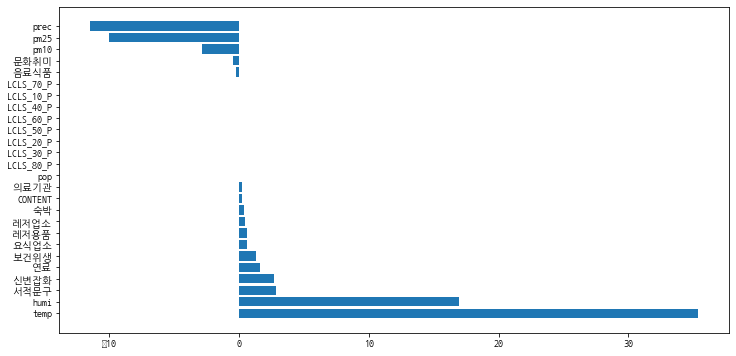

In [55]:
coef_bar('유통업')

## 의복 42 NULL30

In [34]:
# anova('의복')

In [35]:
# coef_bar('의복')

## 직물 43 Null로 삭제

## 신변잡화 44

In [60]:
anova('신변잡화')

(                 df         sum_sq       mean_sq          F        PR(>F)
 pm10            1.0      15.716880     15.716880   0.012900  9.096374e-01
 pm25            1.0       6.371998      6.371998   0.005230  9.423898e-01
 temp            1.0    1651.898137   1651.898137   1.355805  2.450478e-01
 humi            1.0   22814.716624  22814.716624  18.725307  1.965344e-05
 prec            1.0   10051.973780  10051.973780   8.250214  4.319555e-03
 CONTENT         1.0   48348.843224  48348.843224  39.682585  8.842735e-10
 CONTENT:temp    1.0      24.089418     24.089418   0.019772  8.882568e-01
 CONTENT:prec    1.0     934.297526    934.297526   0.766830  3.817916e-01
 CONTENT:humi    1.0     869.796469    869.796469   0.713890  3.987244e-01
 Residual      355.0  432528.252108   1218.389443        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   신변잡화   R-s

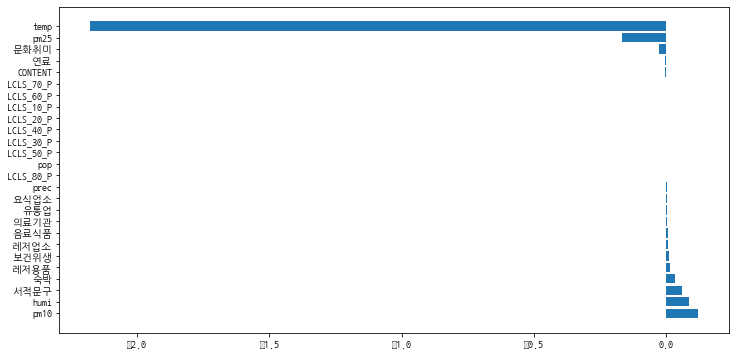

In [61]:
coef_bar('신변잡화')

## 서적문구 50

In [62]:
anova('서적문구')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  6.377018e+04  6.377018e+04   2.765502  9.719903e-02
 pm25            1.0  1.799606e+05  1.799606e+05   7.804296  5.494915e-03
 temp            1.0  5.145073e+05  5.145073e+05  22.312483  3.342708e-06
 humi            1.0  2.720569e+05  2.720569e+05  11.798209  6.630374e-04
 prec            1.0  3.763684e+04  3.763684e+04   1.632185  2.022359e-01
 CONTENT         1.0  1.149655e+06  1.149655e+06  49.856747  8.761462e-12
 CONTENT:temp    1.0  6.784586e+04  6.784586e+04   2.942251  8.716298e-02
 CONTENT:prec    1.0  5.104365e+04  5.104365e+04   2.213594  1.376873e-01
 CONTENT:humi    1.0  9.240293e+04  9.240293e+04   4.007210  4.606655e-02
 Residual      355.0  8.186005e+06  2.305917e+04        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   서적문구   R-squared:    

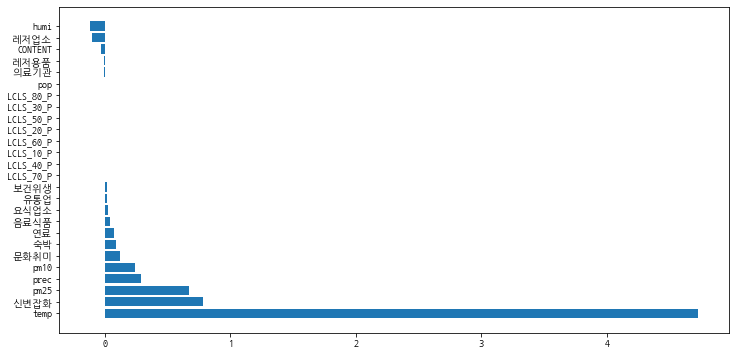

In [63]:
coef_bar('서적문구')

## 자동차판매 60 Null로 삭제

## 자동차정비 62 Null로 삭제

## 의료기관 70

In [64]:
anova('의료기관')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  4.196407e+05  4.196407e+05   0.105493  7.455260e-01
 pm25            1.0  1.015221e+06  1.015221e+06   0.255216  6.137398e-01
 temp            1.0  5.716426e+06  5.716426e+06   1.437048  2.314173e-01
 humi            1.0  1.904237e+06  1.904237e+06   0.478705  4.894620e-01
 prec            1.0  4.291644e+06  4.291644e+06   1.078873  2.996568e-01
 CONTENT         1.0  1.768153e+08  1.768153e+08  44.449448  1.000344e-10
 CONTENT:temp    1.0  4.855060e+07  4.855060e+07  12.205097  5.368421e-04
 CONTENT:prec    1.0  2.135423e+06  2.135423e+06   0.536822  4.642361e-01
 CONTENT:humi    1.0  1.917764e+06  1.917764e+06   0.482105  4.879244e-01
 Residual      355.0  1.412153e+09  3.977895e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   의료기관   R-squared:    

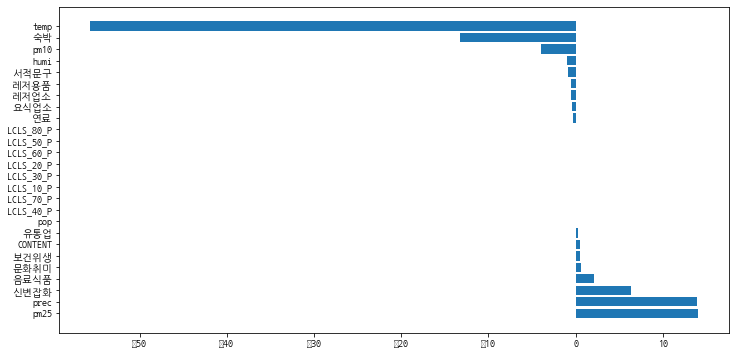

In [65]:
coef_bar('의료기관')

## 보건위생 71

In [66]:
anova('보건위생')

(                 df        sum_sq       mean_sq           F        PR(>F)
 pm10            1.0  6.938055e+01  6.938055e+01    0.000697  9.789598e-01
 pm25            1.0  3.412277e+05  3.412277e+05    3.425603  6.502328e-02
 temp            1.0  6.016235e+02  6.016235e+02    0.006040  9.380980e-01
 humi            1.0  1.508249e+06  1.508249e+06   15.141395  1.191184e-04
 prec            1.0  4.091322e+05  4.091322e+05    4.107301  4.344557e-02
 CONTENT         1.0  1.257252e+07  1.257252e+07  126.216191  2.910162e-25
 CONTENT:temp    1.0  2.012716e+05  2.012716e+05    2.020576  1.560581e-01
 CONTENT:prec    1.0  7.477067e+04  7.477067e+04    0.750627  3.868630e-01
 CONTENT:humi    1.0  5.486405e+05  5.486405e+05    5.507832  1.948050e-02
 Residual      355.0  3.536189e+07  9.961097e+04         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   보건위생   R-s

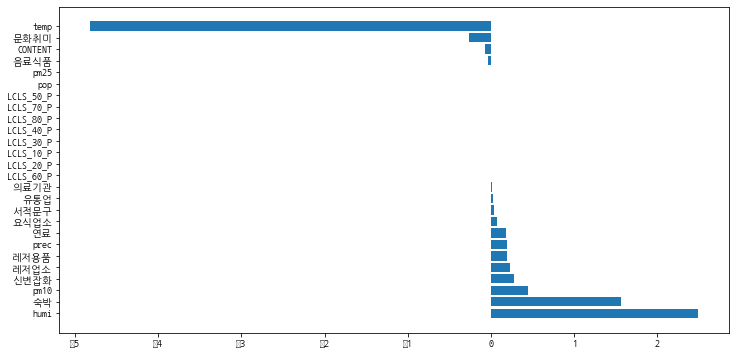

In [67]:
coef_bar('보건위생')

## 요식업소 80

In [68]:
anova('요식업소')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  7.016347e+07  7.016347e+07  24.349238  1.237797e-06
 pm25            1.0  1.435619e+06  1.435619e+06   0.498211  4.807501e-01
 temp            1.0  1.241945e+08  1.241945e+08  43.099931  1.848036e-10
 humi            1.0  1.321574e+08  1.321574e+08  45.863370  5.272369e-11
 prec            1.0  3.333907e+07  3.333907e+07  11.569853  7.466667e-04
 CONTENT         1.0  2.751808e+08  2.751808e+08  95.497593  3.927152e-20
 CONTENT:temp    1.0  1.945317e+07  1.945317e+07   6.750947  9.760125e-03
 CONTENT:prec    1.0  2.047818e+03  2.047818e+03   0.000711  9.787472e-01
 CONTENT:humi    1.0  1.910658e+07  1.910658e+07   6.630668  1.042804e-02
 Residual      355.0  1.022949e+09  2.881547e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   요식업소   R-squared:    

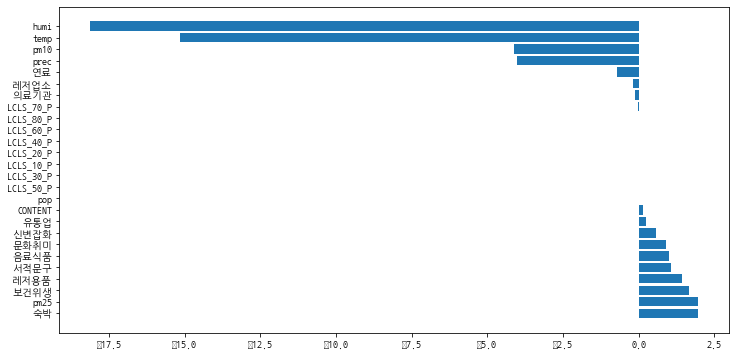

In [69]:
coef_bar('요식업소')

## 음료식품 81

In [70]:
anova('음료식품')

(                 df        sum_sq       mean_sq          F    PR(>F)
 pm10            1.0  1.338571e+06  1.338571e+06  10.275870  0.001470
 pm25            1.0  4.123154e+05  4.123154e+05   3.165241  0.076077
 temp            1.0  2.524566e+05  2.524566e+05   1.938046  0.164752
 humi            1.0  1.339656e+05  1.339656e+05   1.028420  0.311221
 prec            1.0  6.638326e+05  6.638326e+05   5.096075  0.024587
 CONTENT         1.0  3.176303e+06  3.176303e+06  24.383676  0.000001
 CONTENT:temp    1.0  2.342509e+06  2.342509e+06  17.982847  0.000028
 CONTENT:prec    1.0  5.163793e+04  5.163793e+04   0.396411  0.529353
 CONTENT:humi    1.0  2.701152e+05  2.701152e+05   2.073606  0.150748
 Residual      355.0  4.624354e+07  1.302635e+05        NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   음료식품   R-squared:                       0.157
 Model:            

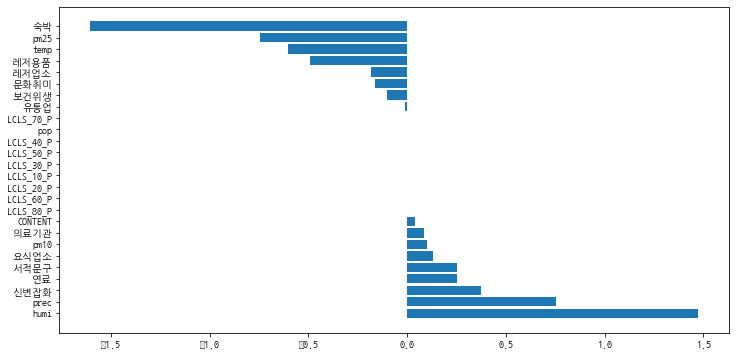

In [71]:
coef_bar('음료식품')

## 수리서비스 92 Null30

In [72]:
# anova('수리서비스')

In [45]:
# coef_bar('수리서비스')

* age30
* 레저용품(25) - pm25 prec
* 유통업(10) - temp humi
* 서적문구(25) - temp 신변 pm25 prec pm10
* 요식(10) - 숙박 pm25 보건 레저용품
* 음료(10)  - humi prec

In [73]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  8.933597e+12  8.933597e+12  31.794280  3.501464e-08
 pm25            1.0  1.863205e+11  1.863205e+11   0.663106  4.160113e-01
 temp            1.0  2.735204e+12  2.735204e+12   9.734471  1.956494e-03
 humi            1.0  2.298315e+11  2.298315e+11   0.817960  3.663906e-01
 prec            1.0  2.489200e+12  2.489200e+12   8.858954  3.116577e-03
 CONTENT         1.0  2.325065e+12  2.325065e+12   8.274806  4.262771e-03
 CONTENT:temp    1.0  3.160753e+12  3.160753e+12  11.248982  8.826305e-04
 CONTENT:prec    1.0  1.199148e+09  1.199148e+09   0.004268  9.479498e-01
 CONTENT:humi    1.0  5.533765e+08  5.533765e+08   0.001969  9.646277e-01
 Residual      355.0  9.974835e+13  2.809813e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [74]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  8.933597e+12  8.933597e+12  31.794280  3.501464e-08
 pm25            1.0  1.863205e+11  1.863205e+11   0.663106  4.160113e-01
 temp            1.0  2.735204e+12  2.735204e+12   9.734471  1.956494e-03
 humi            1.0  2.298315e+11  2.298315e+11   0.817960  3.663906e-01
 prec            1.0  2.489200e+12  2.489200e+12   8.858954  3.116577e-03
 CONTENT         1.0  2.325065e+12  2.325065e+12   8.274806  4.262771e-03
 CONTENT:temp    1.0  3.160753e+12  3.160753e+12  11.248982  8.826305e-04
 CONTENT:prec    1.0  1.199148e+09  1.199148e+09   0.004268  9.479498e-01
 CONTENT:humi    1.0  5.533765e+08  5.533765e+08   0.001969  9.646277e-01
 Residual      355.0  9.974835e+13  2.809813e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [75]:
anova('LCLS_20_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  5.611045e+12  5.611045e+12  4.765399  0.029692
 pm25            1.0  3.639750e+11  3.639750e+11  0.309120  0.578571
 temp            1.0  1.437938e+12  1.437938e+12  1.221225  0.269869
 humi            1.0  4.251533e+12  4.251533e+12  3.610780  0.058216
 prec            1.0  2.697683e+11  2.697683e+11  0.229111  0.632478
 CONTENT         1.0  4.961800e+12  4.961800e+12  4.214002  0.040824
 CONTENT:temp    1.0  3.679487e+12  3.679487e+12  3.124948  0.077961
 CONTENT:prec    1.0  7.347821e+08  7.347821e+08  0.000624  0.980084
 CONTENT:humi    1.0  4.706199e+12  4.706199e+12  3.996923  0.046345
 Residual      355.0  4.179967e+14  1.177456e+12       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_20_P   R-squared:                       0.057
 Model:                       

In [117]:
X = df_20.drop('LCLS_30_P', axis=1)
Y = df_20['LCLS_30_P']

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [124]:
X

array([[ 1.65866775,  1.2826175 ,  0.80454951, ...,  0.20402643,
         0.33590762, -0.28623566],
       [-1.13847957, -1.0460702 , -0.68373283, ...,  0.49247223,
         0.40729178, -0.28623566],
       [-0.30137709, -1.35026814, -0.76797523, ...,  0.45112861,
         0.66379236, -0.27785815],
       ...,
       [-0.58721696, -0.49012223,  0.19519617, ..., -0.31578074,
        -1.74645826, -0.28623566],
       [ 1.43407928,  1.73891442,  2.50624593, ..., -0.76080088,
         1.01890409, -0.13544035],
       [ 2.23034749,  0.9521956 ,  1.98675115, ..., -0.80204354,
        -0.58230009, -0.28623566]])

In [119]:
lasso = Lasso()

In [120]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [121]:

lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
lasso.coef_

array([  -2851.28205843,  -14477.14266576,  -20203.450174  ,
          7303.89012668,  261873.27724224,   81036.56740424,
        105496.87296104,  -90322.40638142,   13270.90226776,
        -69708.96207789,  157845.04322705,  -31034.96546358,
        -51324.4776661 ,  207509.99256421,   57956.69480012,
          1495.19027957, -116286.27115006,  -18258.41697008,
         56123.79065005,   21025.19396028,  -28937.81036598,
        103753.35102972,  -77885.57972673,  988616.71942858,
       -145255.09197561, -143261.74318991])

<BarContainer object of 26 artists>

<Figure size 1296x432 with 0 Axes>

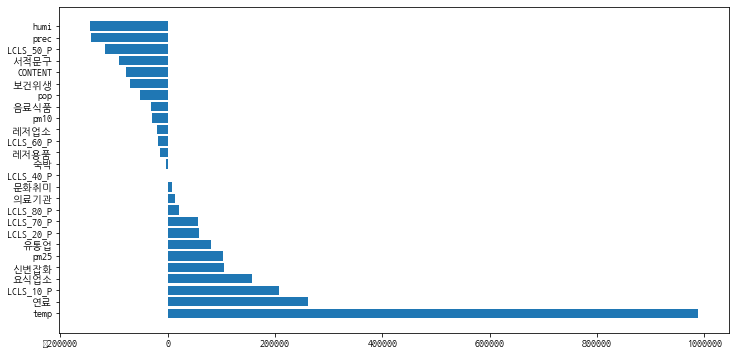

In [123]:
plt.figure(figsize=(18,6))
df_sukbak = pd.DataFrame(lasso.coef_, df_20.drop('LCLS_30_P',axis=1).columns).rename(columns={0:'coef'})
df_sukbak = df_sukbak.sort_values(by='coef', ascending=False)

# bar
plt.figure(figsize=(12, 6))
plt.barh(df_sukbak.index, df_sukbak['coef'])

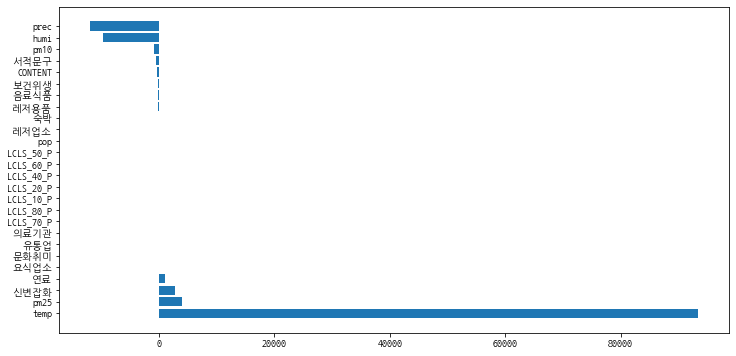

In [94]:
coef_bar('LCLS_30_P')

In [76]:
anova('LCLS_30_P')

(                 df        sum_sq       mean_sq            F         PR(>F)
 pm10            1.0  7.222900e+13  7.222900e+13   370.584506   4.620354e-57
 pm25            1.0  1.160194e+12  1.160194e+12     5.952593   1.518444e-02
 temp            1.0  3.596653e+14  3.596653e+14  1845.330820  1.092469e-142
 humi            1.0  5.339780e+13  5.339780e+13   273.967469   5.181462e-46
 prec            1.0  2.159204e+13  2.159204e+13   110.782016   9.946317e-23
 CONTENT         1.0  2.766559e+13  2.766559e+13   141.943518   9.261032e-28
 CONTENT:temp    1.0  4.271923e+12  4.271923e+12    21.917905   4.056146e-06
 CONTENT:prec    1.0  5.428322e+11  5.428322e+11     2.785103   9.602621e-02
 CONTENT:humi    1.0  1.281016e+11  1.281016e+11     0.657250   4.180758e-01
 Residual      355.0  6.919149e+13  1.949056e+11          NaN            NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       

In [77]:
anova('LCLS_40_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  7.366107e+09  7.366107e+09  0.960162  0.327813
 pm25            1.0  1.148729e+10  1.148729e+10  1.497353  0.221891
 temp            1.0  1.325930e+09  1.325930e+09  0.172833  0.677857
 humi            1.0  1.113881e+10  1.113881e+10  1.451930  0.229021
 prec            1.0  7.639643e+09  7.639643e+09  0.995817  0.319004
 CONTENT         1.0  2.785305e+10  2.785305e+10  3.630609  0.057534
 CONTENT:temp    1.0  4.028943e+09  4.028943e+09  0.525167  0.469123
 CONTENT:prec    1.0  6.239313e+08  6.239313e+08  0.081329  0.775671
 CONTENT:humi    1.0  7.353784e+09  7.353784e+09  0.958556  0.328218
 Residual      355.0  2.723465e+12  7.671731e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_40_P   R-squared:                       0.028
 Model:                       

In [78]:
anova('LCLS_50_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  5.250810e+10  5.250810e+10   1.269774  2.605701e-01
 pm25            1.0  4.130655e+11  4.130655e+11   9.988933  1.710224e-03
 temp            1.0  7.832616e+07  7.832616e+07   0.001894  9.653103e-01
 humi            1.0  4.044735e+12  4.044735e+12  97.811565  1.567290e-20
 prec            1.0  1.348097e+12  1.348097e+12  32.600283  2.393819e-08
 CONTENT         1.0  1.078233e+12  1.078233e+12  26.074312  5.370406e-07
 CONTENT:temp    1.0  9.761613e+10  9.761613e+10   2.360597  1.253254e-01
 CONTENT:prec    1.0  3.080522e+10  3.080522e+10   0.744946  3.886639e-01
 CONTENT:humi    1.0  2.745522e+10  2.745522e+10   0.663934  4.157207e-01
 Residual      355.0  1.468007e+13  4.135231e+10        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_50_P   R-squared:    

In [79]:
anova('LCLS_60_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  1.847013e+10  1.847013e+10  2.733306  0.099160
 pm25            1.0  3.295581e+09  3.295581e+09  0.487697  0.485413
 temp            1.0  1.640962e+09  1.640962e+09  0.242838  0.622468
 humi            1.0  2.305924e+09  2.305924e+09  0.341243  0.559484
 prec            1.0  2.118415e+09  2.118415e+09  0.313494  0.575897
 CONTENT         1.0  1.849493e+07  1.849493e+07  0.002737  0.958306
 CONTENT:temp    1.0  1.046713e+10  1.046713e+10  1.548981  0.214107
 CONTENT:prec    1.0  4.184764e+09  4.184764e+09  0.619283  0.431839
 CONTENT:humi    1.0  2.932973e+09  2.932973e+09  0.434037  0.510442
 Residual      355.0  2.398888e+12  6.757430e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_60_P   R-squared:                       0.019
 Model:                       

In [80]:
anova('LCLS_70_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  9.549002e+08  9.549002e+08   1.549316  2.140575e-01
 pm25            1.0  1.886506e+07  1.886506e+07   0.030608  8.612167e-01
 temp            1.0  8.823692e+09  8.823692e+09  14.316352  1.813076e-04
 humi            1.0  9.815934e+09  9.815934e+09  15.926256  8.003357e-05
 prec            1.0  2.129735e+09  2.129735e+09   3.455475  6.386996e-02
 CONTENT         1.0  1.601366e+10  1.601366e+10  25.982005  5.614999e-07
 CONTENT:temp    1.0  9.074497e+07  9.074497e+07   0.147233  7.014236e-01
 CONTENT:prec    1.0  1.427255e+08  1.427255e+08   0.231571  6.306581e-01
 CONTENT:humi    1.0  2.143083e+08  2.143083e+08   0.347713  5.557856e-01
 Residual      355.0  2.187995e+11  6.163366e+08        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_70_P   R-squared:    

In [81]:
anova('LCLS_80_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.825324e+10  1.825324e+10  23.580050  1.799526e-06
 pm25            1.0  2.957240e+09  2.957240e+09   3.820246  5.142143e-02
 temp            1.0  6.302719e+10  6.302719e+10  81.420301  1.170467e-17
 humi            1.0  2.058987e+10  2.058987e+10  26.598571  4.171400e-07
 prec            1.0  6.722107e+09  6.722107e+09   8.683807  3.422640e-03
 CONTENT         1.0  8.718035e+09  8.718035e+09  11.262203  8.765598e-04
 CONTENT:temp    1.0  1.426982e+08  1.426982e+08   0.184342  6.679289e-01
 CONTENT:prec    1.0  2.457016e+07  2.457016e+07   0.031740  8.587002e-01
 CONTENT:humi    1.0  1.603779e+08  1.603779e+08   0.207181  6.492644e-01
 Residual      355.0  2.748044e+11  7.740968e+08        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_80_P   R-squared:    

# Viz

In [29]:
df_20.head()

,숙박,레저용품,레저업소,문화취미,연료,유통업,신변잡화,서적문구,의료기관,보건위생,요식업소,음료식품,pop,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,CONTENT,temp,humi,prec
0,170.0,588.0,1435.0,481.0,1346.0,31921.0,91.0,875.0,1738.0,1946.0,17722.0,2929.0,265602.51,5.775959e+06,4.653959e+06,7.123695e+06,460575.529718,8.889679e+05,102938.908335,158304.695151,125768.139866,68.127083,35.221528,515,16.580764,56.770833,0.0
1,33.0,144.0,905.0,319.0,1198.0,27563.0,100.0,621.0,8115.0,1214.0,15401.0,3701.0,286616.48,5.798567e+06,4.068040e+06,6.922594e+06,517274.801816,7.320147e+05,85751.772442,189721.667844,159773.285544,71.924306,29.909028,888,19.631111,57.827083,0.0
2,74.0,86.0,875.0,270.0,953.0,27872.0,94.0,602.0,6476.0,1175.0,15424.0,3737.0,296960.76,5.882238e+06,4.045719e+06,6.679634e+06,396954.848039,6.941187e+05,109181.181977,146743.364491,83460.961960,72.979861,24.331944,856,19.192500,61.674306,0.1
3,62.0,85.0,877.0,155.0,1051.0,30752.0,103.0,668.0,5931.0,1241.0,16000.0,3715.0,298269.85,6.163598e+06,4.284199e+06,6.238373e+06,400734.630537,9.144325e+05,106260.195832,133827.487702,85526.543799,18.221528,10.952778,893,14.075417,60.129861,18.5
4,38.0,129.0,915.0,294.0,1019.0,25341.0,47.0,479.0,5600.0,1002.0,14145.0,3398.0,289595.03,6.131853e+06,3.723724e+06,5.135552e+06,430144.414585,1.099378e+06,120809.906702,149481.681510,89173.629481,8.854861,3.891667,864,8.620000,77.163194,10.5
